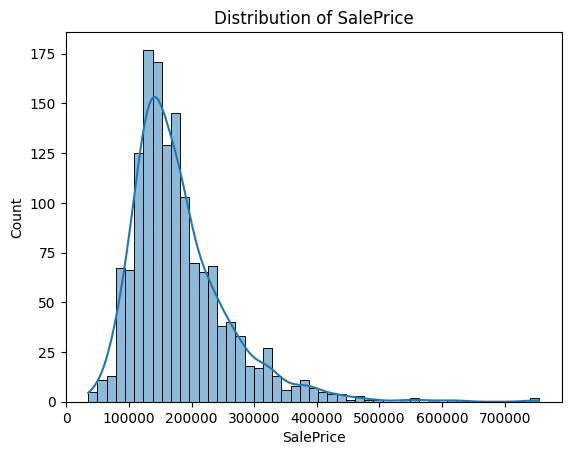

c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


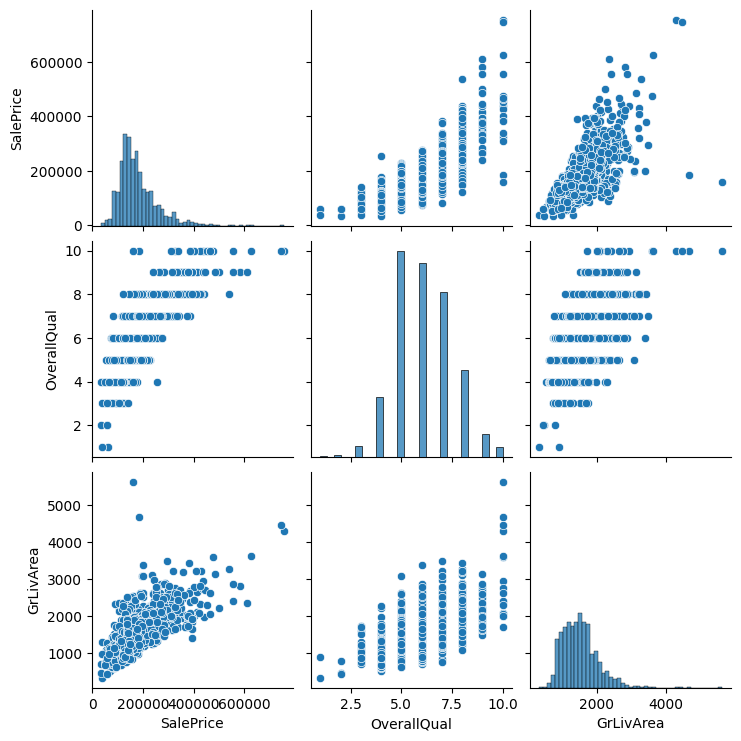

ValueError: 
All the 20 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py", line 1123, in fit
    X, y = self._validate_data(
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 1146, in check_X_y
    X = check_array(
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 957, in check_array
    _assert_all_finite(
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 122, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py", line 171, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('train.csv')

# Exploratory Data Analysis (EDA)
# - Visualize the distribution of the target variable (SalePrice)
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

# - Explore relationships between variables using scatter plots, correlation matrix, etc.
sns.pairplot(data, vars=['SalePrice', 'OverallQual', 'GrLivArea'])
plt.show()

# Dummy variables for categorical variables
data['Street'] = data['Street'].astype('category')
data = pd.get_dummies(data, columns=['MSZoning', 'Street', 'SaleType', 'SaleCondition'])

# Remove whitespace from column names
data.columns = data.columns.str.strip()

# Split the data into features (X) and target variable (y)
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numerical and categorical columns
numerical_columns = X.select_dtypes(include=np.number).columns
categorical_columns = X.select_dtypes(exclude=np.number).columns

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Create Ridge and Lasso pipelines
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('lasso', Lasso())
])

# Define parameter grids
param_grid = {'ridge__alpha': [0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(ridge_pipeline, param_grid, cv=5)

param_grid = {'lasso__alpha': [0.1, 1, 10, 100]}
lasso_grid = GridSearchCV(lasso_pipeline, param_grid, cv=5)

# Fit the models
ridge_grid.fit(X_train, y_train)
lasso_grid.fit(X_train, y_train)

# Get optimal alpha values
ridge_alpha = ridge_grid.best_params_['ridge__alpha']
lasso_alpha = lasso_grid.best_params_['lasso__alpha']

# Train models with optimal alpha values
ridge_model = Ridge(alpha=ridge_alpha)
lasso_model = Lasso(alpha=lasso_alpha)

ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# Evaluate models
ridge_pred = ridge_model.predict(X_test)
lasso_pred = lasso_model.predict(X_test)

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

ridge_r2 = r2_score(y_test, ridge_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

# Print or log evaluation metrics
print(f'Ridge RMSE: {ridge_rmse}, R-squared: {ridge_r2}')
print(f'Lasso RMSE: {lasso_rmse}, R-squared: {lasso_r2}')


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object
